# **Netflix : Data Exploration and Visualisation by Kunal Gandhi**

## Importing the Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Dataset

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv


--2023-07-06 13:56:23--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.102, 13.35.37.31, 13.35.37.159, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.8’

netflix.csv.8       100%[===================>]   3.24M  --.-KB/s    in 0.03s   

2023-07-06 13:56:23 (118 MB/s) - ‘netflix.csv.8’ saved [3399671/3399671]



## Reading the Dataset

In [ ]:
df=pd.read_csv("netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Observing the dataset different datatypes available and a glimpse over the count of NaN values present in a particular column.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### We observe that in the rating category at the last some values mentioned are 74 min, 84 min and 66 mi, they can't be a category, they are missing values in duration column.   

In [ ]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### We get the shape and statistical summary of the dataset to get the understanding of the data

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### We Check for duplicates values column-wise present

In [ ]:
df.isna().sum() # Missing values in each coln

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

### Here, we explode our data because there are a lot of columns in our data where the information is coupled in a single cell. We use the functions called stacking and unstacking for creation of a new dataframe.For the ‘cast,’ ‘country,’ ‘listed_in,’ and ‘director’ columns, we split the values based on the comma separator and created separate rows for each value. This transformation enables us to analyze the data at a more granular level.

In [ ]:
unstacked1=df["cast"].apply(lambda x:str(x).split(",")).tolist()
unstacked2=df["country"].apply(lambda x:str(x).split(",")).tolist()
unstacked3=df["listed_in"].apply(lambda x:str(x).split(",")).tolist()
unstacked4=df["director"].apply(lambda x:str(x).split(",")).tolist()

In [ ]:
df_cast=pd.DataFrame(unstacked1,index=df["title"])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [ ]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                         
Dick Johnson Is Dead 0                     nan
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [ ]:
df_cast.reset_index(inplace=True)

In [ ]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
df_cast.columns=['title','cast']

In [ ]:
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
df_country=pd.DataFrame(unstacked2,index=df["title"])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [ ]:
df_listed_in=pd.DataFrame(unstacked3,index=df["title"])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace=True)
df_listed_in=df_listed_in[['title',0]]
df_listed_in.columns=['title','listed_in']
df_listed_in

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
df_director=pd.DataFrame(unstacked4,index=df["title"])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
Merge1=df_cast.merge(df_director, on="title", how="inner")

Merge1

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


In [ ]:
Merge2=Merge1.merge(df_listed_in, on="title", how="inner")
Merge2

,title,cast,director,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows
...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies


In [ ]:
Merge3=Merge2.merge(df_country, on="title", how="inner")
Merge3

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [ ]:
final_merge=Merge3.merge(df,on="title",how="inner")
final_merge.drop(columns=["cast_y","director_y","country_y","listed_in_y"],axis=1,inplace=True)
final_merge

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


### As we have exploded the data and used a function called merge to collate all the data with the original dataframe which created a dataframe with unique values but still we need to take care of the NaN values available.
# **Now comes the step of handling missing values**

### We have columns with name "cast" and "director" where we can't perform any imputations. For those we need to replace them with "no cast" and "No director" in the dataframe. For column country we have replace the same mode of the country popular

In [ ]:
(final_merge["cast_x"]=="nan").value_counts()


False    199916
True       2149
Name: cast_x, dtype: int64

In [ ]:
final_merge['cast_x'].replace( "nan", 'No cast', inplace=True)

In [ ]:
(final_merge["listed_in_x"]=="nan").value_counts() # as they were unique and present

False    202065
Name: listed_in_x, dtype: int64

In [ ]:
(final_merge["director_x"]=="nan").value_counts()

False    151422
True      50643
Name: director_x, dtype: int64

In [ ]:
final_merge['director_x'].replace( "nan", 'No director', inplace=True)

In [ ]:
(final_merge["country_x"]=="nan").value_counts()

False    190168
True      11897
Name: country_x, dtype: int64

In [ ]:
country_mode=final_merge["country_x"].mode()
country_mode

0    United States
Name: country_x, dtype: object

In [ ]:
final_merge["country_x"].replace("nan",country_mode[0],inplace=True)

In [ ]:
final_merge

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [ ]:
final_merge["rating"].value_counts()

TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [ ]:
final_merge.isna().sum()

title             0
cast_x            0
director_x        0
listed_in_x       0
country_x         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         202065 non-null  object
 1   cast_x        202065 non-null  object
 2   director_x    202065 non-null  object
 3   listed_in_x   202065 non-null  object
 4   country_x     202065 non-null  object
 5   show_id       202065 non-null  object
 6   type          202065 non-null  object
 7   date_added    201907 non-null  object
 8   release_year  202065 non-null  int64 
 9   rating        201998 non-null  object
 10  duration      202062 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
final_merge

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


### Replacing the missing values in duration with unrecognized values in rating column and subsequently converting those to NaN values.

In [ ]:
final_merge.loc[126582,"duration"]=final_merge.loc[126582,"rating"]
final_merge.loc[131648,"duration"]=final_merge.loc[131648,"rating"]
final_merge.loc[131782,"duration"]=final_merge.loc[131782,"rating"]

In [ ]:
final_merge.loc[126582,"rating"]=np.nan
final_merge.loc[131648,"rating"]=np.nan
final_merge.loc[131782,"rating"]=np.nan

In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         202065 non-null  object
 1   cast_x        202065 non-null  object
 2   director_x    202065 non-null  object
 3   listed_in_x   202065 non-null  object
 4   country_x     202065 non-null  object
 5   show_id       202065 non-null  object
 6   type          202065 non-null  object
 7   date_added    201907 non-null  object
 8   release_year  202065 non-null  int64 
 9   rating        201995 non-null  object
 10  duration      202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 28.1+ MB


In [ ]:
final_merge.isna().sum()

title             0
cast_x            0
director_x        0
listed_in_x       0
country_x         0
show_id           0
type              0
date_added      158
release_year      0
rating           70
duration          0
description       0
dtype: int64

### Dealing with missing values in rating column categorizing on movies and Tv show basis and calculate the mode for replacement of the same accordingly.

In [ ]:
movie_rating=final_merge.loc[final_merge['type'] == 'Movie', 'rating'].mode()[0]
movie_rating

'TV-MA'

In [ ]:
Tv_rating=final_merge.loc[final_merge['type'] == 'TV Show', 'rating'].mode()[0]
Tv_rating

'TV-MA'

In [ ]:
final_merge['rating'] = final_merge.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else Tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

In [ ]:
final_merge.isna().sum()

title             0
cast_x            0
director_x        0
listed_in_x       0
country_x         0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
description       0
dtype: int64

### Dates have been filled with 0 as no information is provided in other columns for imputation and to maintain the data integrity and accuracy.  

In [ ]:
final_merge["date_added"].fillna(0,inplace=True)

In [ ]:
final_merge.isna().sum()

title           0
cast_x          0
director_x      0
listed_in_x     0
country_x       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

### Dealing with duplicate rows, keeping the first row and dropping the other

In [ ]:
final_merge.loc[final_merge.duplicated()]

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
39354,Rust Creek,Micah Hauptman,Jen McGowan,Thrillers,United States,s1632,Movie,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...
135656,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135657,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135658,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135659,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135660,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135661,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."


In [ ]:
final_merge.drop_duplicates(keep="first")

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


### Converting date_added column in datetime format and extracting month_name, year, day from the same for analysis. With this we also rename some columns and eliminating any white space present in the cell for avoiding duplicacy and accurate results.

In [ ]:
final_merge["date_added"]=pd.to_datetime(final_merge["date_added"])
final_merge['month_added'] = final_merge['date_added'].dt.month
final_merge['month_name_added'] = final_merge['date_added'].dt.month_name()
final_merge['year_added'] = final_merge['date_added'].dt.year
final_merge['week_added'] = final_merge['date_added'].dt.isocalendar().week

In [ ]:
final_merge.rename(columns={"cast_x": "cast", "director_x": "director","listed_in_x":"genre","country_x":"country"},inplace=True)

In [ ]:
final_merge['rating'] = final_merge['rating'].str.strip()
final_merge['country'] = final_merge['country'].str.strip()
final_merge['director'] = final_merge['director'].str.strip()
final_merge['cast'] = final_merge['cast'].str.strip()
final_merge['genre'] = final_merge['genre'].str.strip()

In [ ]:
final_merge

,title,cast,director,genre,country,show_id,type,date_added,release_year,rating,duration,description,month_added,month_name_added,year_added,week_added
0,Dick Johnson Is Dead,No cast,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",9,September,2021,38
1,Blood & Water,Ama Qamata,No director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
2,Blood & Water,Ama Qamata,No director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
3,Blood & Water,Ama Qamata,No director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
4,Blood & Water,Khosi Ngema,No director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,3,March,2019,9
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,3,March,2019,9
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,3,March,2019,9
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,3,March,2019,9


## Finally after data sanitization and preprocessing our dataframe : final_merge is ready for analysis !!!!

# **Exploratary Data Analysis**

## Analysis 1 : Distribution of Movie/ Tv show In Netflix Library



### First Calculation of the distribution in percentage terms of Movie/ Tvshow

In [ ]:

x=final_merge.groupby(["type"])["type"].count()
y = len(final_merge)
r = ((x/y) * 100).round(2)
df_type=pd.DataFrame(r)
df_type.rename({'type': '%'}, axis=1, inplace=True)
df_type

,%
type,
Movie,72.21
TV Show,27.79


### Visualizing the distribution in a 3D Pie Plot





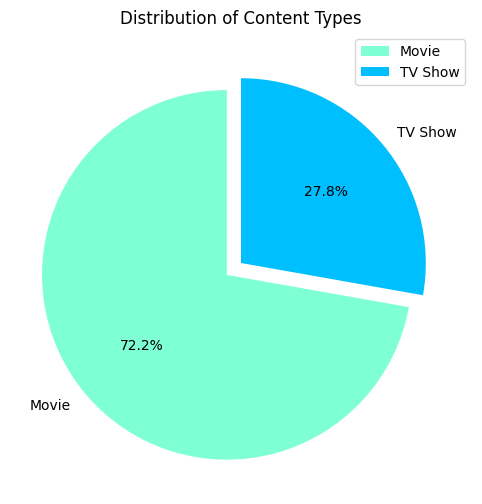

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df_type["%"],labels=df_type.index,colors=("aquamarine","deepskyblue"),explode=(0.1,0),autopct='%1.1f%%',startangle=90)

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()

### Count and Visualization of Categorical variable : "Rating"

In [ ]:
final_merge["rating"].value_counts()

TV-MA       73985
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

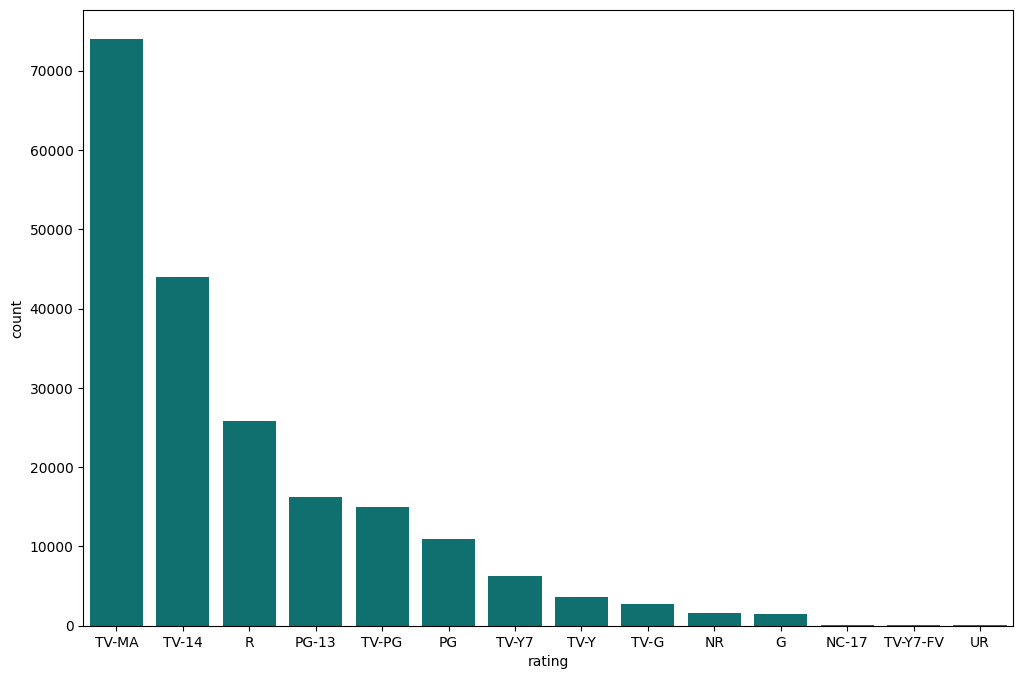

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="rating",data=final_merge,order=final_merge['rating'].value_counts().index, color='teal')
plt.show()

### Count and visualization of Categorical variable : "type"



In [ ]:
x

type
Movie      145917
TV Show     56148
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

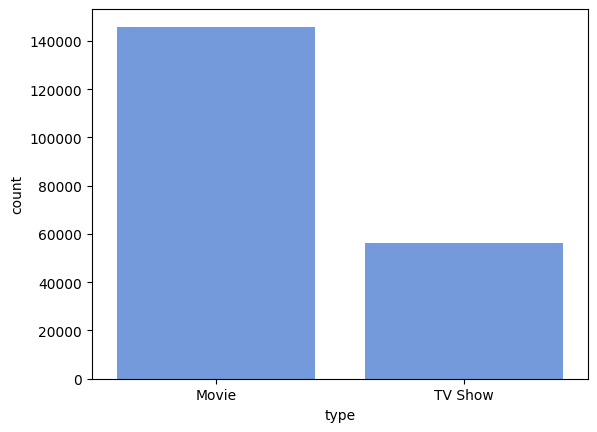

In [ ]:
sns.countplot(x="type",data=final_merge,order=final_merge['type'].value_counts().index, color='cornflowerblue')

### Count and visualization of Categorical variable : "country"



In [ ]:
country_counts=final_merge["country"].value_counts()
top_10_countries = country_counts.head(10)
country_counts

United States     71247
India             22814
United Kingdom    12965
Japan              8679
France             8254
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country, Length: 123, dtype: int64

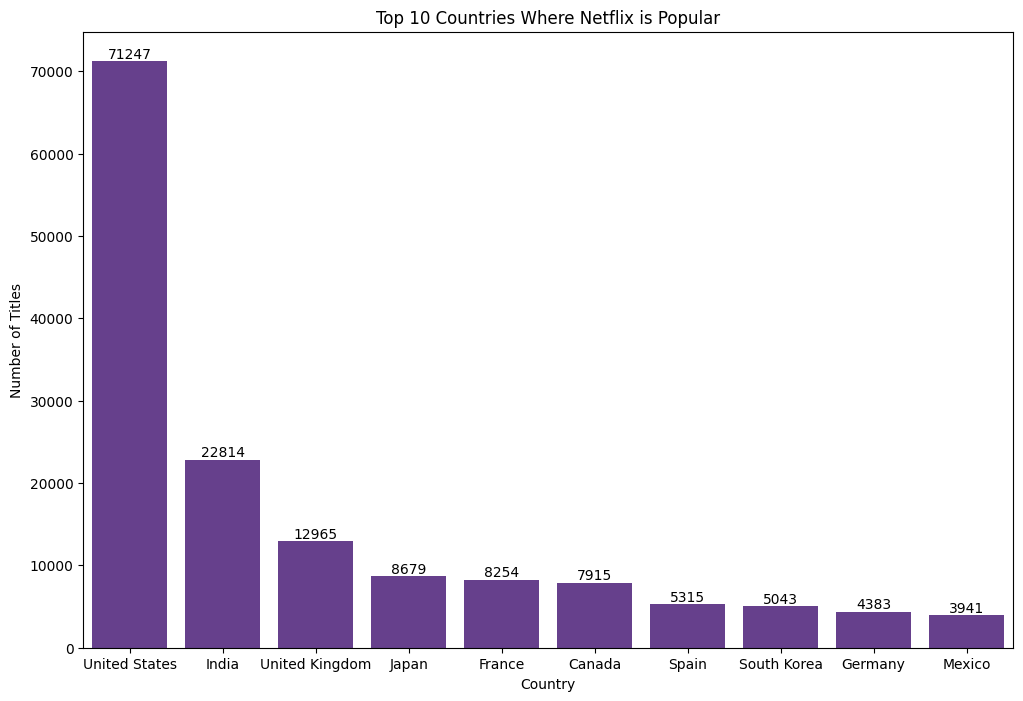

In [ ]:
plt.figure(figsize=(12, 8))
bar_plot=sns.barplot(x=top_10_countries.index, y=top_10_countries.values,color="rebeccapurple")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular')
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

### Count of Categorical variable : Director

In [ ]:
final_merge["director"].value_counts()[1:]

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Brendon Marotta          1
Charlie Siskel           1
Adam Bolt                1
Anthony Palmer           1
Kirsten Johnson          1
Name: director, Length: 4993, dtype: int64

In [ ]:
final_merge["genre"].value_counts()

Dramas                          29806
International Movies            28243
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

### Count of Categorical Variable: Cast/ Actors

In [ ]:
final_merge["cast"].value_counts()[1:11]

Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
Frank Langella      128
Anupam Kher         127
John Rhys-Davies    125
Shah Rukh Khan      108
Naseeruddin Shah    106
Radhika Apte        104
Name: cast, dtype: int64

In [ ]:
final_merge["country"].nunique()

123

In [ ]:
final_merge["cast"].nunique()

36440

In [ ]:
final_merge["rating"].nunique()

14

In [ ]:
final_merge["director"].nunique()

4994

In [ ]:
final_merge["genre"].nunique()

42

In [ ]:
final_merge["title"].nunique()

8807

##**Insights from analysis 1** : We have calculated the frequency, their respective unique values for all the categorical variables present in the dataframe. Our Analysis has revealed that Netflix has added more movies than TV shows and they dominate the netflix library. The country where Netflix is popular which is "United States". It summarizes our data to a level where we have unique 8807 titles, 36439 cast/ Actors (eliminating "No cast"), 4993 directors (eliminating "No director"), 14 ratings, 123 countries and 42 genres present in the data. We can observe the distribution of ratings on Netflix. It helps us identify the most common rating categories and their relative frequency. It offers insights into the evolving content landscape and audience reception.

# Analysis 2 : Comparison of Tv shows vs Movies

## Number of movies produced in each country and plotting the top 10 countries

In [ ]:
final_merge.rename(columns={"listed_in":"genre"},inplace=True)
Movie=final_merge.loc[final_merge["type"]=="Movie"]
Popular_Country=Movie.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]

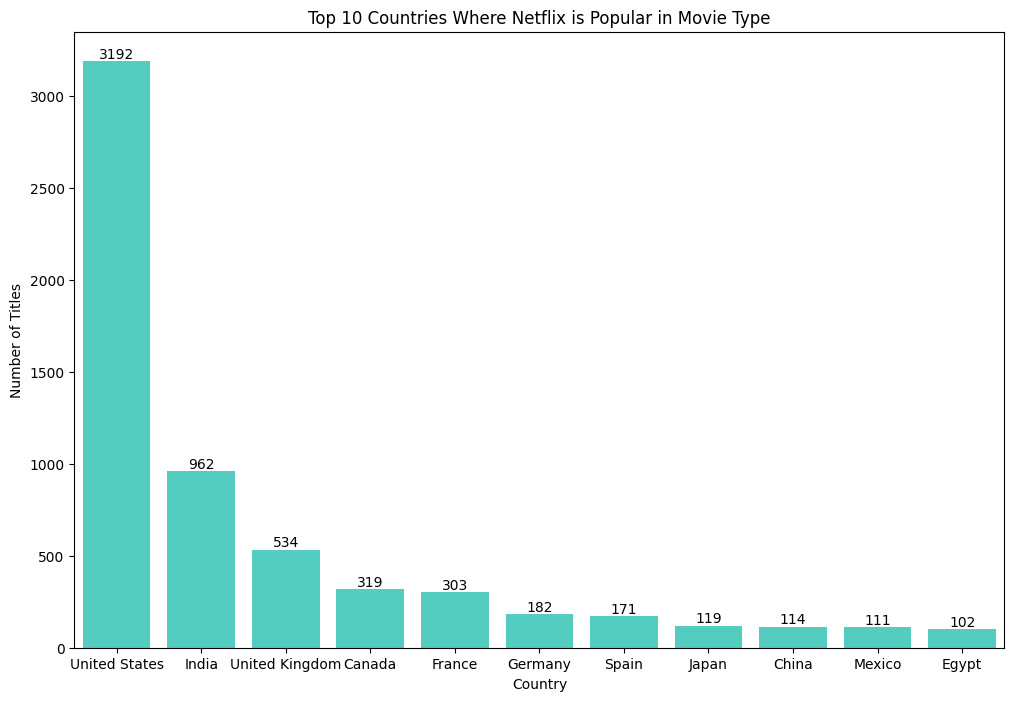

In [ ]:
plt.figure(figsize=(12, 8))
bar_plot_y=sns.barplot(x=Popular_Country.index, y=Popular_Country.values,color="turquoise")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular in Movie Type')
for index, value in enumerate(Popular_Country.values):
    bar_plot_y.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## Number of Tv shows produced in each country and plotting the top 10 countries

In [ ]:
TV_show=final_merge.loc[final_merge["type"]=="TV Show"]
popular_countries=TV_show.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]

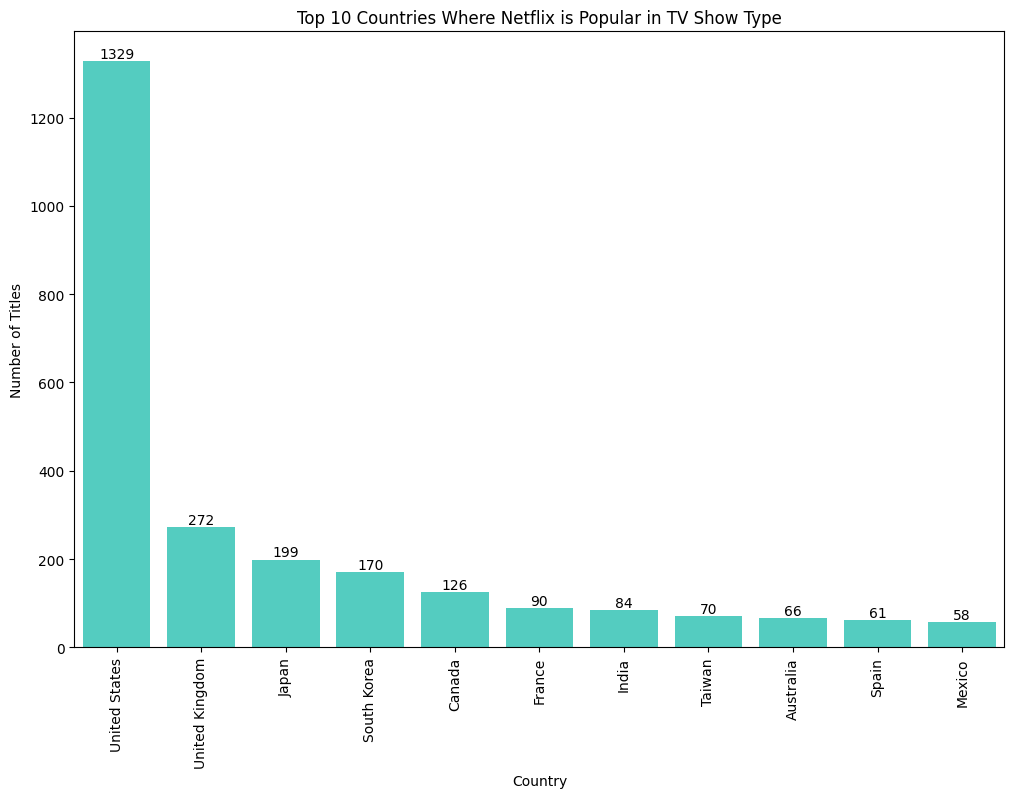

In [ ]:
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=popular_countries.index, y=popular_countries.values,color="turquoise")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Countries Where Netflix is Popular in TV Show Type')
for index, value in enumerate(popular_countries.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## **Insights from analysis 2** : Our analysis reveals the top 10 countries by categorising movies and Tv Shows separately. Again "United states" as attained the first position in both the categories.

# Analysis 3 :  Best time to launch a TV show/Movie ?

## Best week to release the Tv-show or the Movie

---



In [ ]:
Best_week_Movie=Movie.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Movie

week_added
1    316
Name: title, dtype: int64

In [ ]:
Best_week_Tvshow=TV_show.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Tvshow

week_added
27    86
Name: title, dtype: int64

## Best month to release the Tv-show or the Movie

---



In [ ]:
Best_month_Movie=Movie.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Movie

month_name_added
July         565
April        550
December     547
January      546
October      545
March        529
August       519
September    519
November     498
June         492
May          439
February     382
Name: title, dtype: int64

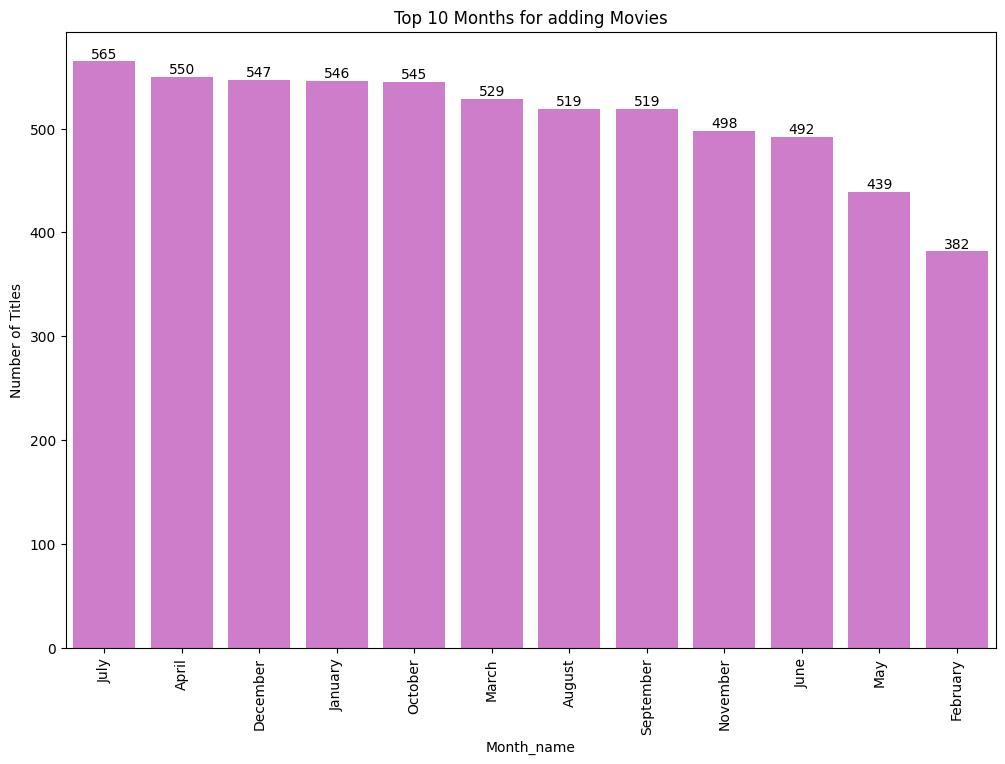

In [ ]:
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=Best_month_Movie.index, y=Best_month_Movie.values,color="orchid")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Movies')
for index, value in enumerate(Best_month_Movie.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [ ]:
Best_month_Tvshow=TV_show.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Tvshow

month_name_added
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
January      202
May          193
February     181
Name: title, dtype: int64

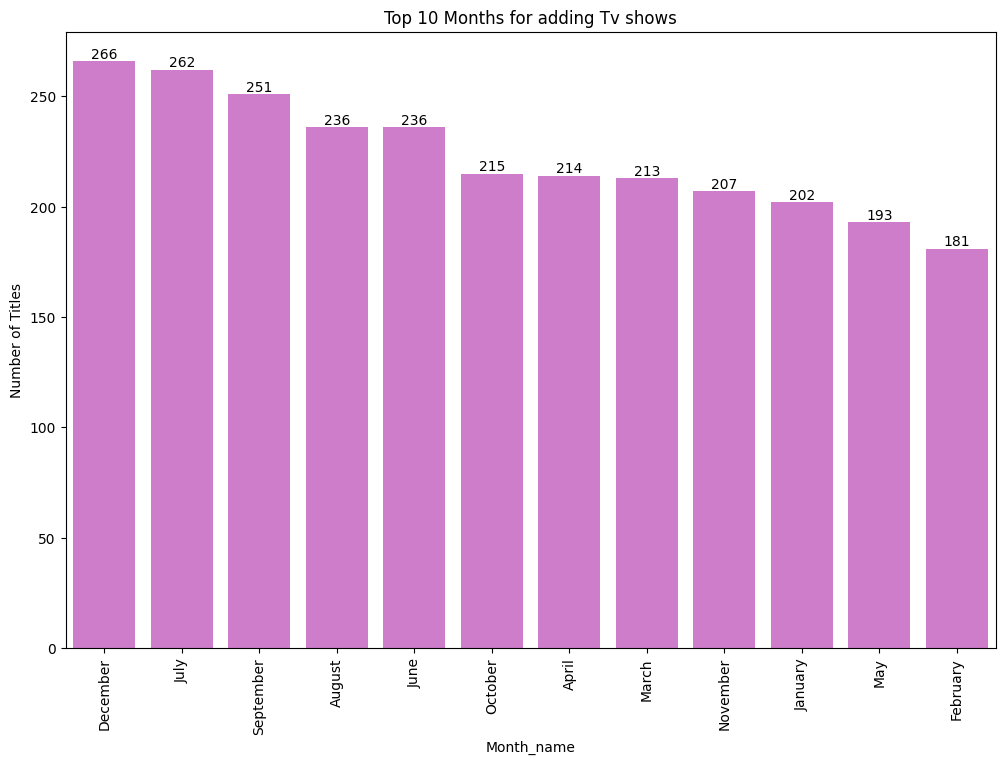

In [ ]:
plt.figure(figsize=(12, 8))
bar_plot_h=sns.barplot(x=Best_month_Tvshow.index, y=Best_month_Tvshow.values,color="orchid")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Tv shows')
for index, value in enumerate(Best_month_Tvshow.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## **Insights from Analysis 3**: The above analysis shows us the best time for movie/Tv show addition in netflix library indicating a strategic approach to content release. If we categorize the same into week or month basis, we obtain result as :-

### Week-Wise
1.   Movie Week --> 1st Week
2.   Tv_show_Week -->27th Week

### Month-Wise
1.   Movie Month --> July
2.   Movie Month --> December





# Analysis 4 : Analysis of Actors/Directors of different types of TVshows/Movies.

### Top 10 Actors/ Directors in Movie Category

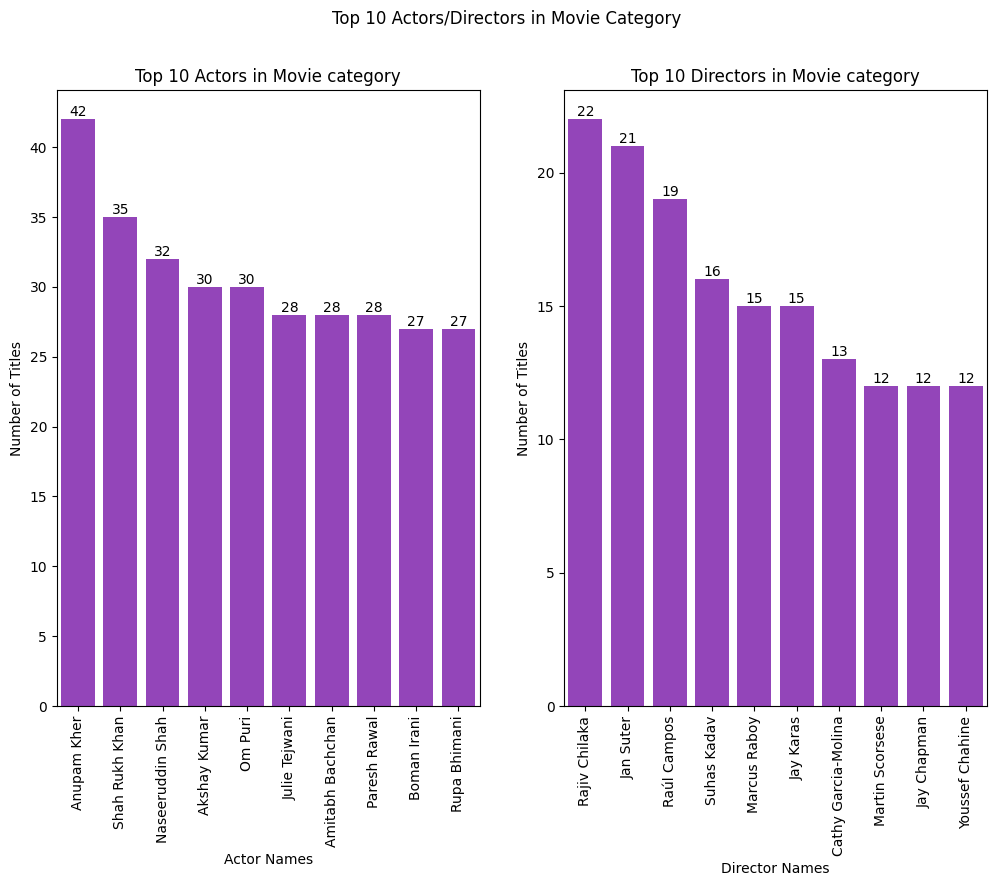

In [ ]:
top_10_actors_movie=Movie.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_movie=Movie.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]

plt.figure(figsize=(12, 8)).suptitle("Top 10 Actors/Directors in Movie Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_movie.index, y=top_10_actors_movie.values,color="darkorchid")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in Movie category')
for index, value in enumerate(top_10_actors_movie.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')

plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_movie.index, y=top_10_directors_movie.values,color="darkorchid")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in Movie category')
for index, value in enumerate(top_10_directors_movie.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

### Top 10 Actors/ Directors in TV Show Category

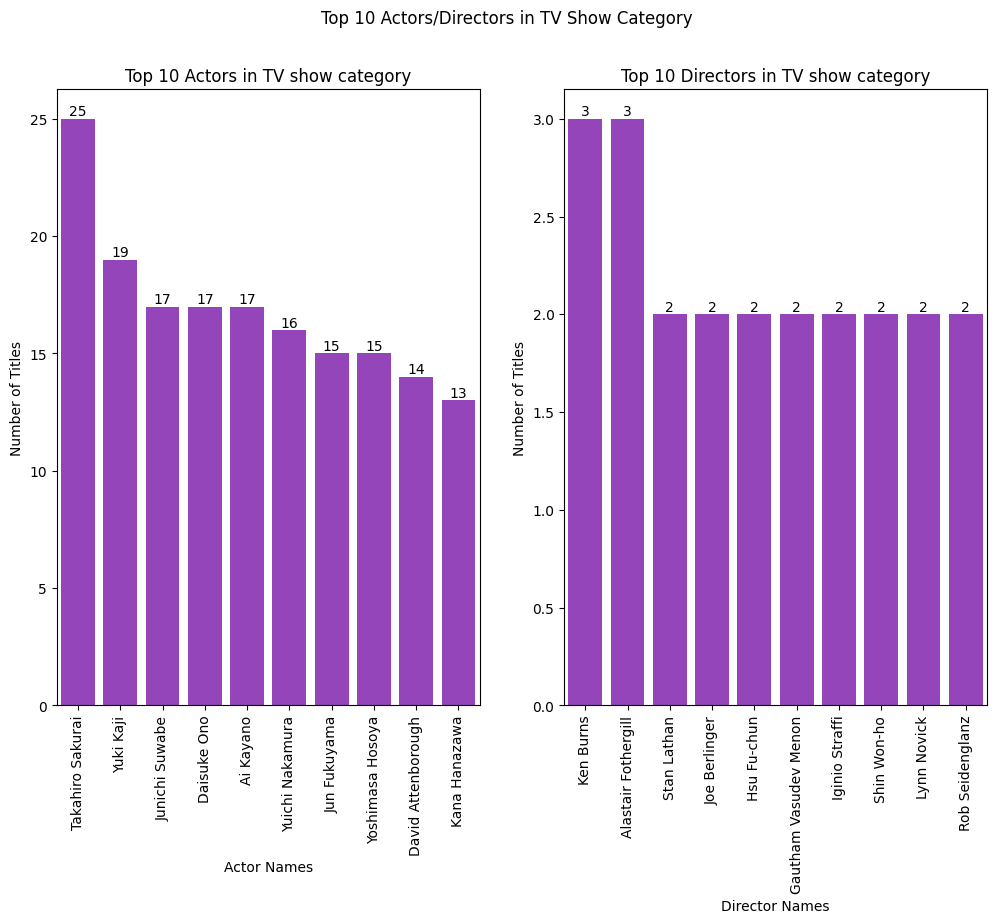

In [ ]:
top_10_actors_Tvshow=TV_show.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_Tvshow=TV_show.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]

plt.figure(figsize=(12, 8)).suptitle("Top 10 Actors/Directors in TV Show Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_Tvshow.index, y=top_10_actors_Tvshow.values,color="darkorchid")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in TV show category')
for index, value in enumerate(top_10_actors_Tvshow.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')

plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_Tvshow.index, y=top_10_directors_Tvshow.values,color="darkorchid")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in TV show category')
for index, value in enumerate(top_10_directors_Tvshow.values):
    bar_plot_h.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## **Insights from analysis 4**: This analysis showcases the top 10 Actors/ directors streamed in movie/Tv show category.
### The top actor in movie category is "Anupam Kher" and director "Rajiv Chilaka" .
### The top actor in Tv show category is "Takahiro Sakurai" and director "Ken Burns" .


# Analysis 5 : Which genre movies are more popular or produced more?

### Visualizing via Word map the genre in Movie category

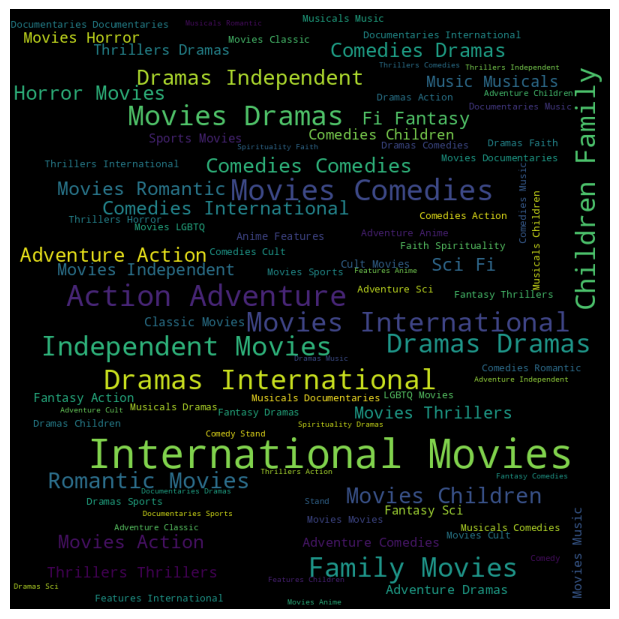

In [ ]:
from wordcloud import WordCloud

Text_movie_genre=" ".join(Movie["genre"])
wordcloud_movie = WordCloud(width=800,height=800,min_font_size=10,background_color="black").generate(Text_movie_genre)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_movie)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Visualizing via Word map the genre in TV Show category

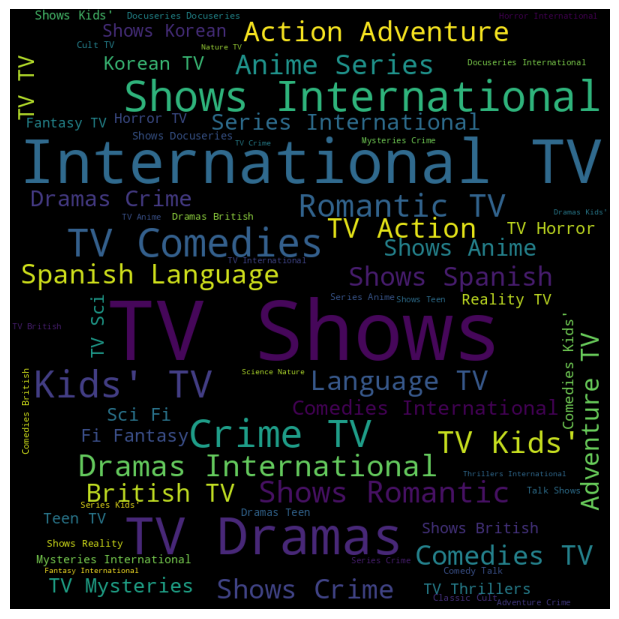

In [ ]:
Text_TV_show_genre=" ".join(TV_show["genre"])
wordcloud_Tvshow = WordCloud(width=800,height=800,min_font_size=10,background_color="black").generate(Text_TV_show_genre)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_Tvshow)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##**Insights from analysis 5**: Words like Dramas, international movies pops out in movie category and Tv shows, international Tv in Tv show category capturing recurring themes in Netflix contents.

# Analysis 6 : Top 10 Genres by Movie/TV Show Count

In [ ]:
top_10_movie_genre=final_merge.loc[final_merge["type"]=="Movie"]["genre"].value_counts()[:11]
top_10_movie_genre

Dramas                      29806
International Movies        28243
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7107
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Music & Musicals             3077
Name: genre, dtype: int64

In [ ]:
top_10_TVshow_genre=final_merge.loc[final_merge["type"]=="TV Show"]["genre"].value_counts()[:11]
top_10_TVshow_genre

International TV Shows       12845
TV Dramas                     8942
TV Comedies                   4963
Crime TV Shows                4733
Kids' TV                      4568
Romantic TV Shows             3049
Anime Series                  2313
TV Action & Adventure         2288
Spanish-Language TV Shows     2126
British TV Shows              1808
TV Mysteries                  1281
Name: genre, dtype: int64

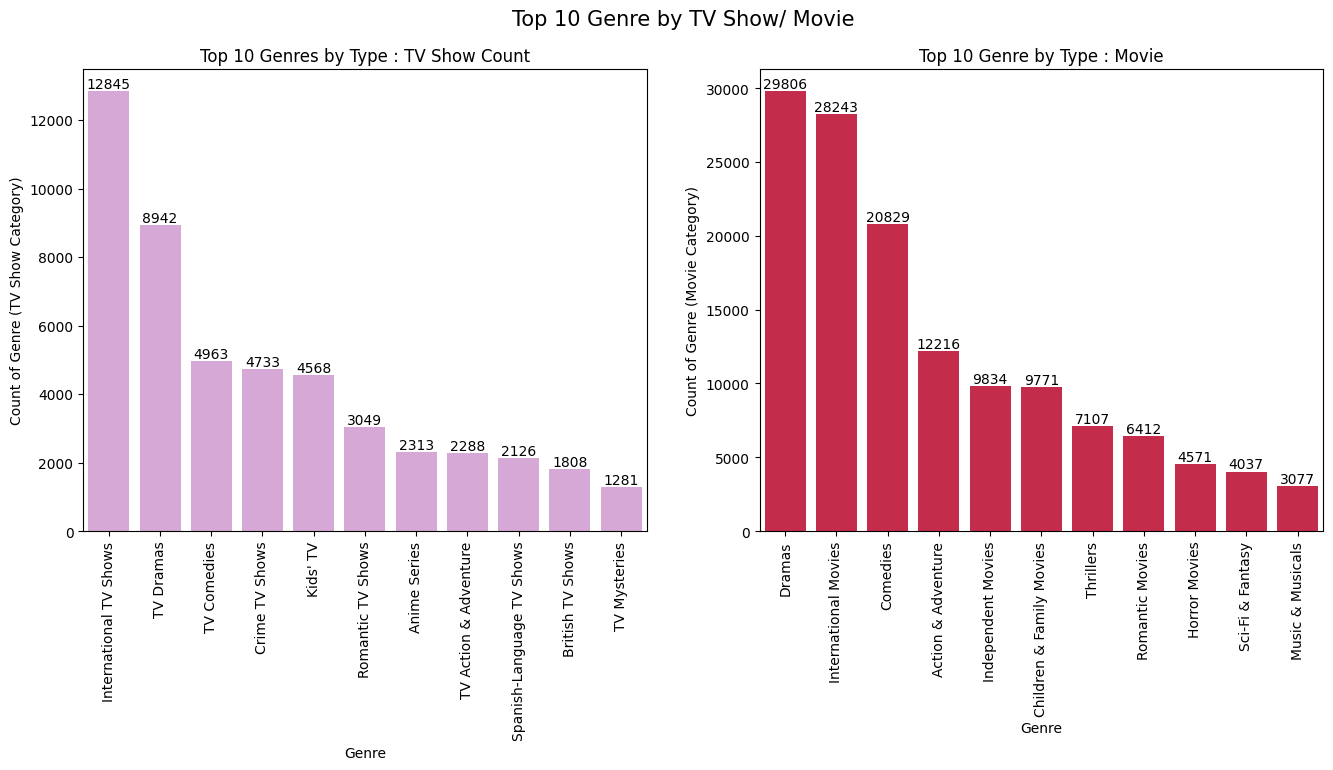

In [ ]:
plt.figure(figsize=(16, 6)).suptitle("Top 10 Genre by TV Show/ Movie", fontsize=15)
plt.subplot(1,2,1)
bar_plot = sns.barplot(x=top_10_TVshow_genre.index, y=top_10_TVshow_genre.values,color="plum")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre (TV Show Category)')
plt.title('Top 10 Genres by Type : TV Show Count')
for index, value in enumerate(top_10_TVshow_genre.values):
    bar_plot.text(index, value,str(value), ha='center', va='bottom')

plt.subplot(1,2,2)
bar_plot = sns.barplot(x=top_10_movie_genre.index, y=top_10_movie_genre.values,color="crimson")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre (Movie Category)')
plt.title('Top 10 Genre by Type : Movie')

for index, value in enumerate(top_10_movie_genre.values):
    bar_plot.text(index, value,str(value), ha='center', va='bottom')

plt.show()

## **Insights from Analysis 6:** This analysis provides insights into viewer preferences which is International Tv shows in Tv show category and Dramas in movie category.

# Analysis 7 : How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
final_merge["release_year"].dtype

dtype('int64')

In [ ]:
Movie["release_year"].max()

2021

In [ ]:
Movie["release_year"].min()

1942

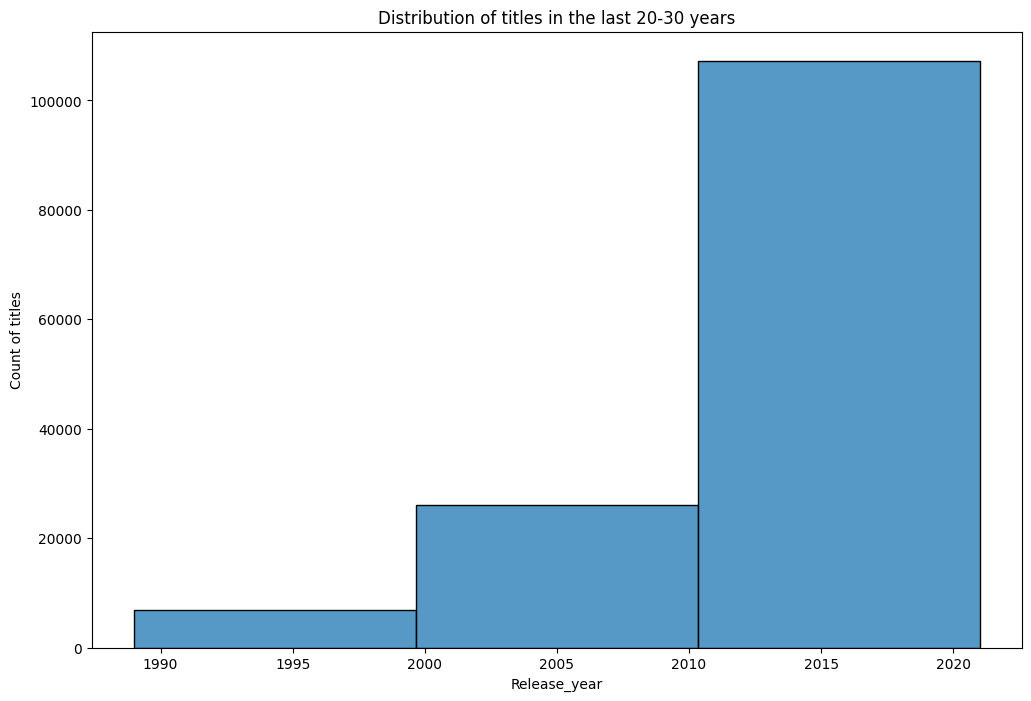

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(Movie['release_year'],binrange=([1989,2021]),bins=3)
plt.xlabel('Release_year')
plt.ylabel('Count of titles')
plt.title('Distribution of titles in the last 20-30 years')
plt.show()

## **Insights from analysis 7**: This analysis shows the quantum of movies added  in the last 20-30 years has increased to a great extent. It also sums up that the viewers preferences to the movies more in comparison to TV shows.

# Analysis 8 : Does Netflix has more focus on TV Shows than movies in recent years

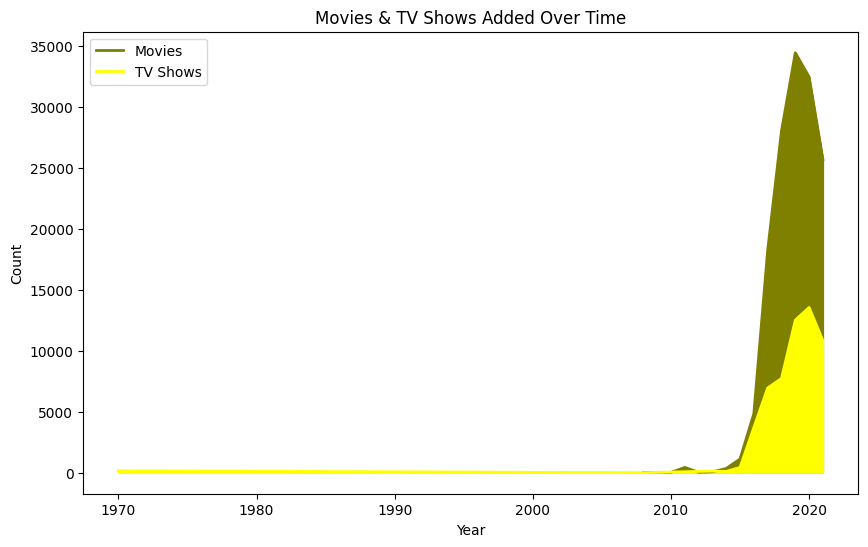

In [ ]:
movies_count = Movie['year_added'].value_counts().sort_index()
tv_shows_count = TV_show['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(movies_count.index, movies_count.values, color='olive',
label='Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values, color='yellow',
label='TV Shows', linewidth=2)
plt.fill_between(movies_count.index, movies_count.values, color='olive')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, color='yellow')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
plt.show()

## **Insights from Analysis 8**: This analysis clearly proves the fact that netflix has added more movies than Tv shows. The jump seen in the visualization is more for movies in comparison to TV shows and it also tells us about the viewers preferences.

# Analysis 9 : Distribution of Movie Lengths and TV Show Episode Counts?

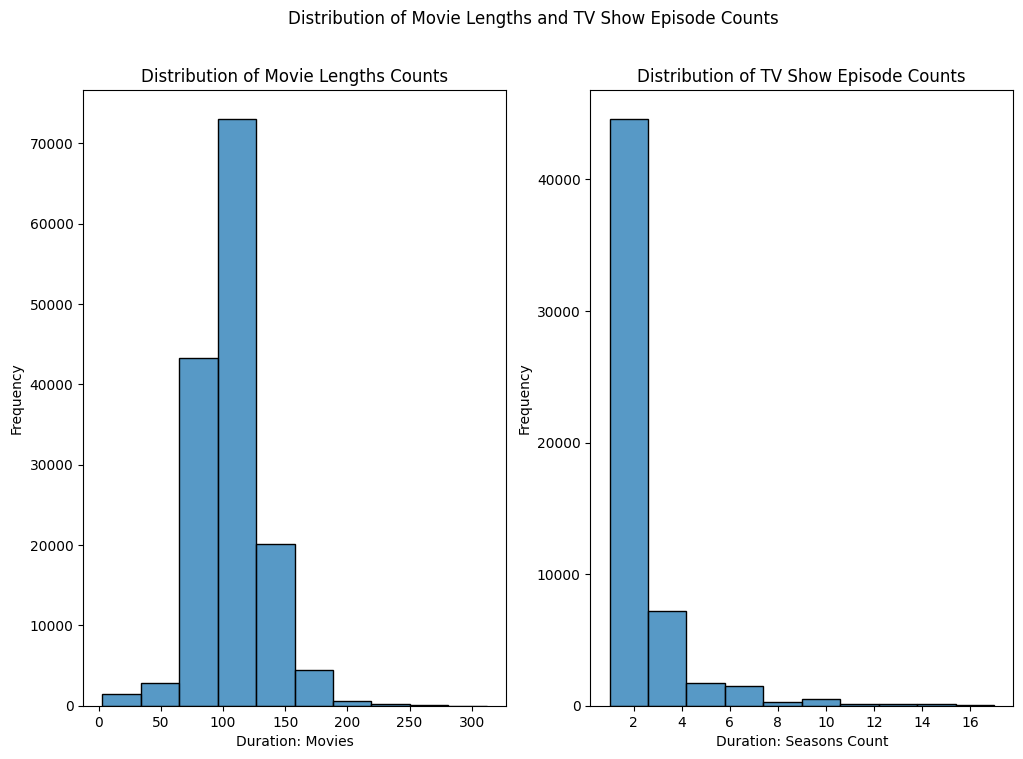

In [ ]:
movie_lengths=Movie["duration"].str.extract("(\d+)",expand=False).astype(int)
Tv_show_episodes = TV_show['duration'].str.extract("(\d+)", expand=False).astype(int)
plt.figure(figsize=(12,8)).suptitle("Distribution of Movie Lengths and TV Show Episode Counts")
plt.subplot(1,2,1)
sns.histplot(movie_lengths,bins=10)
plt.xlabel('Duration: Movies')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths Counts')
plt.subplot(1,2,2)
sns.histplot(Tv_show_episodes,bins=10)
plt.xlabel('Duration: Seasons Count')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Episode Counts')

plt.show()

# Analysis 9 : Duration Distribution for Movies and TV Shows

In [ ]:
TV_show['duration'] = TV_show['duration'].str.extract('(\d+)', expand=False).astype(int)
Movie['duration'] = Movie['duration'].str.extract('(\d+)', expand=False).astype(int)

<ipython-input-912-8c4d08ac7307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_show['duration'] = TV_show['duration'].str.extract('(\d+)', expand=False).astype(int)
<ipython-input-912-8c4d08ac7307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['duration'] = Movie['duration'].str.extract('(\d+)', expand=False).astype(int)


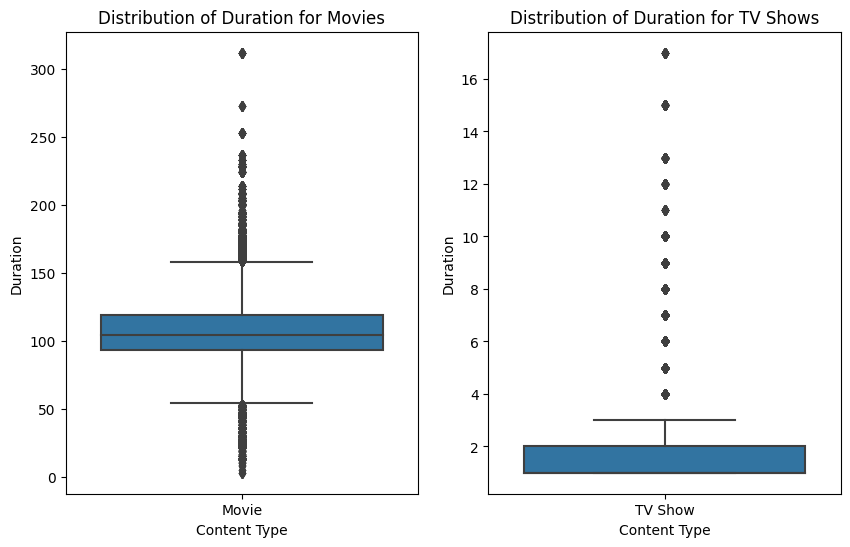

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(data=Movie, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')

plt.subplot(1,2,2)
sns.boxplot(data=TV_show, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

## **Insights from analysis 8 & 9**: From the above mentioned histogram and box plot analysis it provides insights regarding the duration of movies/Tv shows which are added in the Netflix library, provides a median value of duration which is 100 minutes approax, hardly 2 seasons in movie and TV show category respectively. There are also some movies and Tv shows durations which are acting as an outliers in the box plot.

# Analysis 10 : Understanding what content is available in different countries?

In [ ]:
Country_content_wise=Movie.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise=pd.DataFrame(Country_content_wise)
Country_content_wise

genre
country       genre                          
United States Comedies                   9171
              Dramas                     9131
India         International Movies       7059
United States Children & Family Movies   5665
India         Dramas                     5569
...                                       ...
Georgia       Documentaries                 1
Switzerland   Faith & Spirituality          1
Iceland       Stand-Up Comedy               1
Germany       Faith & Spirituality          1
Slovenia      Comedies                      1

[896 rows x 1 columns]

In [ ]:
Country_content_wise_TV=TV_show.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise_TV=pd.DataFrame(Country_content_wise_TV)
Country_content_wise_TV

genre
country        genre                        
United States  TV Dramas                3429
               TV Comedies              2711
               International TV Shows   2268
               Kids' TV                 2258
Japan          International TV Shows   1809
...                                      ...
Czech Republic British TV Shows            1
Norway         Docuseries                  1
               Science & Nature TV         1
Greece         Science & Nature TV         1
Thailand       Docuseries                  1

[519 rows x 1 columns]

## **Insights from analysis 10**: Above analysis provides the number of contents available in Movie and Tv show category separately. It aslo provides the insight regarding the favourability of contents among viewers in different categories.

# Analysis 11 : Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [ ]:
Movie["days_diff"]=abs(Movie["year_added"]-Movie["release_year"])
Movie["days_diff"]=Movie["days_diff"]*365
Movie["days_diff"].mode()

<ipython-input-953-f045e1826cbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie["days_diff"]=abs(Movie["year_added"]-Movie["release_year"])
<ipython-input-953-f045e1826cbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie["days_diff"]=Movie["days_diff"]*365


0    0
Name: days_diff, dtype: int64

In [ ]:
TV_show["days_diff"]=abs(TV_show["year_added"]-TV_show["release_year"])
TV_show["days_diff"]=TV_show["days_diff"]*365
TV_show["days_diff"].mode()

<ipython-input-952-9f63e86ae243>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_show["days_diff"]=abs(TV_show["year_added"]-TV_show["release_year"])
<ipython-input-952-9f63e86ae243>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_show["days_diff"]=TV_show["days_diff"]*365


0    0
Name: days_diff, dtype: int64

## **Insights from analysis 11**:In the above analysis we capture the mode of difference between the release and the date the movie or a TV show is added which comes out to be 0 in both categories implying that most movies Tv shows get added in the year frame.    

# **RECOMMENDATIONS**:

##   As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.
##   It should build relationships with other providers preferably the multinational television providers such as "HBO" and "Starz" in order to increase the selection streaming titles.
## This will ultimately lead to attracting more customers and therfore increase in market share.
##  It would help in lowering the churn rate and help expand their customer base.
##   Some genre movies are still missing in the Netflix Library. Though, its a very last library. I would recommend them to build relationship with other providers to complete the library as much as possible.











# **CONCLUSION**: This case study has been an enlightening and entertaining journey into the world of Netflix, and we encourage you to explore the captivating stories within its ever-changing content offerings. Let the data guide your streaming adventures!

In [7]:
pip install notebook-as-pdf
